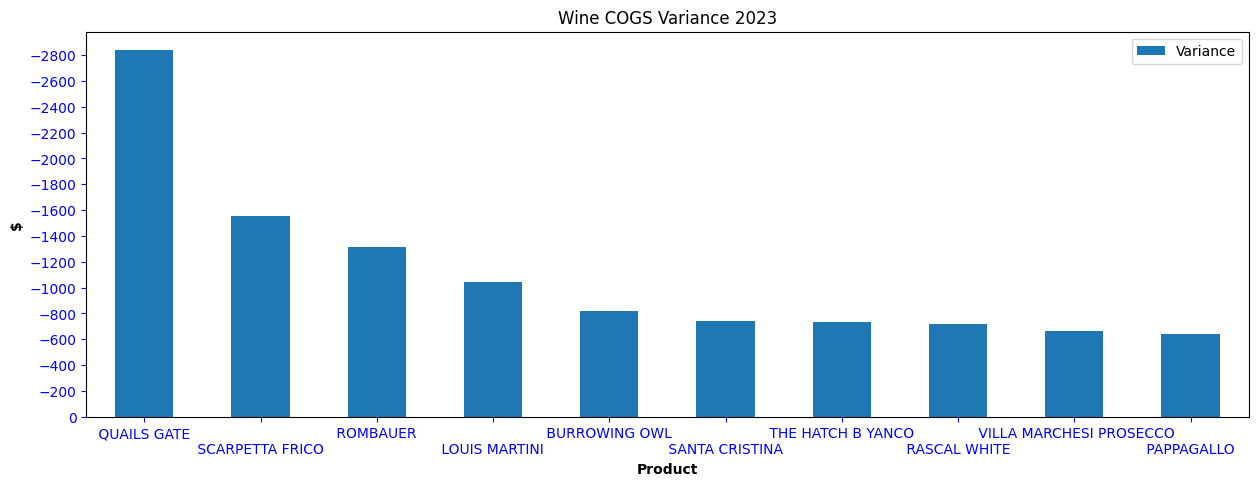

In [59]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

pd.set_option('display.max_rows', None)
%run DocumentCleaner.ipynb

WDATA = DocClean("WineYear2023.csv")


WDATA['Variance'] = WDATA['Variance'].str.replace(',', '').astype(float)
WDATA['Product Name'] = WDATA["Product Name"].str.replace("WINE BTL", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("WINE KEG", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("PINOT GRIGIO", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("CHENIN BLANC", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("PINOT NOIR", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("CARNEROS CHARDONNAY", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("SONOMA CABERNET SAUVIGNON", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("MERLOT", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("TOSCANA", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("PINOT BLANC BLEND", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("FAMILLE PERRIN", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("COTES DU VENTOUX ", '')
WDATA['Product Name'] = WDATA["Product Name"].str.replace("SUPER TUSCAN SANGIOVESE BLEND", '')

WDATA = WDATA.groupby(WDATA["Product Name"]).agg({"Variance": 'sum'}).sort_values("Variance").reset_index()

WDATA.drop([0,1], axis = 0, inplace = True)
ax = WDATA.head(10).plot.bar(x = "Product Name", y = "Variance", rot = 0, figsize = (15,5))
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
ax.set_ylim(ax.get_ylim()[::-1])


    

plt.title("Wine COGS Variance 2023")
plt.xlabel('Product',fontweight='bold')
plt.ylabel('$',fontweight='bold')
plt.tick_params(axis = 'x', labelsize = 10, colors = 'blue')
plt.tick_params(axis = 'y', labelsize = 10, colors = 'blue')
plt.locator_params(axis='y', nbins = 20)    
